<a href="https://colab.research.google.com/github/NilarghyaDebnath/Machine-Learning/blob/main/ND%7C_Supply_Chain_Demand_Forecasting_For_Inventory_Control_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab
import pylab
from scipy import stats

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataCoSupplyChainDataset.csv', encoding = 'latin')

In [ ]:
df.shape

(180519, 53)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


In [ ]:
df[df.duplicated()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


In [ ]:
df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [ ]:
for column in df.columns:
    print("Column:", column)
    # Check if the column is of object data type
    if df[column].dtype == 'object':
        # Calculate value counts and sort alphabetically
        sorted_value_counts = df[column].value_counts().sort_values()
    else:
        # For non-object types, sort by index (values)
        sorted_value_counts = df[column].value_counts().sort_index()
    print(sorted_value_counts)
    print()


Column: Type
Type
CASH        19616
PAYMENT     41725
TRANSFER    49883
DEBIT       69295
Name: count, dtype: int64

Column: Days for shipping (real)
Days for shipping (real)
0     5080
1     4657
2    56618
3    28765
4    28513
5    28163
6    28723
Name: count, dtype: int64

Column: Days for shipment (scheduled)
Days for shipment (scheduled)
0      9737
1     27814
2     35216
4    107752
Name: count, dtype: int64

Column: Benefit per order
Benefit per order
-4274.979980    1
-3442.500000    1
-3366.000000    1
-3000.000000    1
-2592.000000    1
               ..
 720.000000     2
 720.299988     1
 721.599976     1
 864.000000     1
 911.799988     1
Name: count, Length: 21998, dtype: int64

Column: Sales per customer
Sales per customer
7.49000       3
7.99000       3
8.19000       3
8.29000       3
8.39000       3
             ..
1859.98999    1
1889.98999    1
1899.98999    1
1919.98999    1
1939.98999    1
Name: count, Length: 2927, dtype: int64

Column: Delivery Status
Deliver

Text(0.5, 1.0, 'Days for shipping (real)')

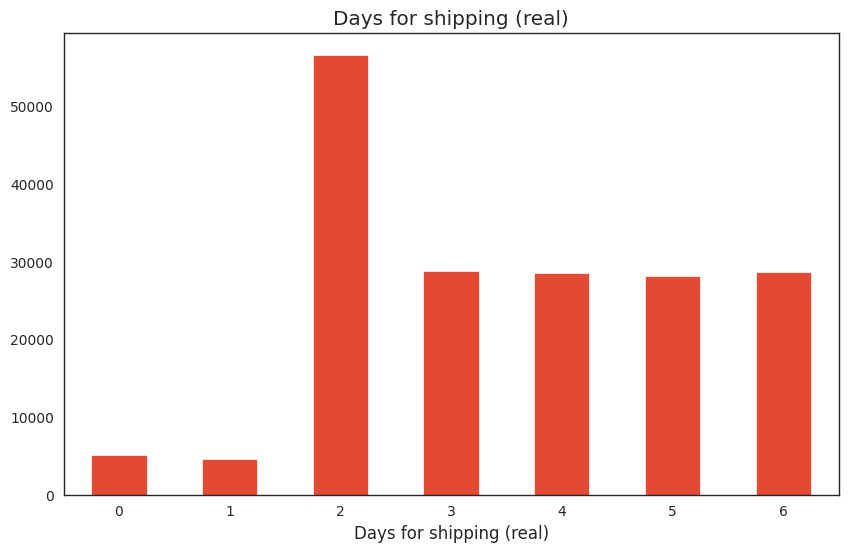

In [ ]:
plt.figure(figsize=(10,6))
df['Days for shipping (real)'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation = 0)
plt.title("Days for shipping (real)")

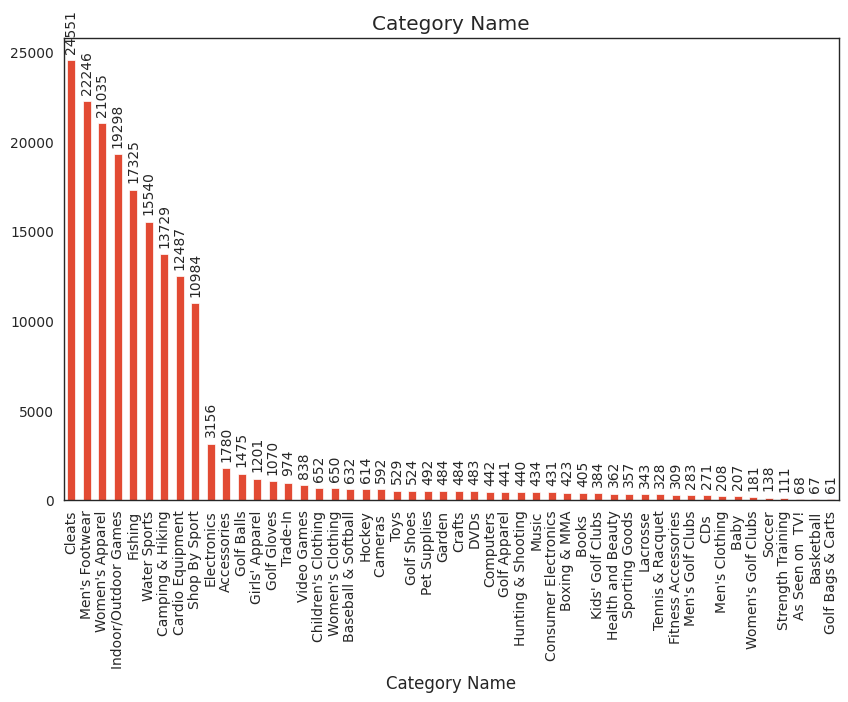

In [ ]:
plt.figure(figsize=(10,6))
ax = df['Category Name'].value_counts().plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Category Name')

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                rotation=90,
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

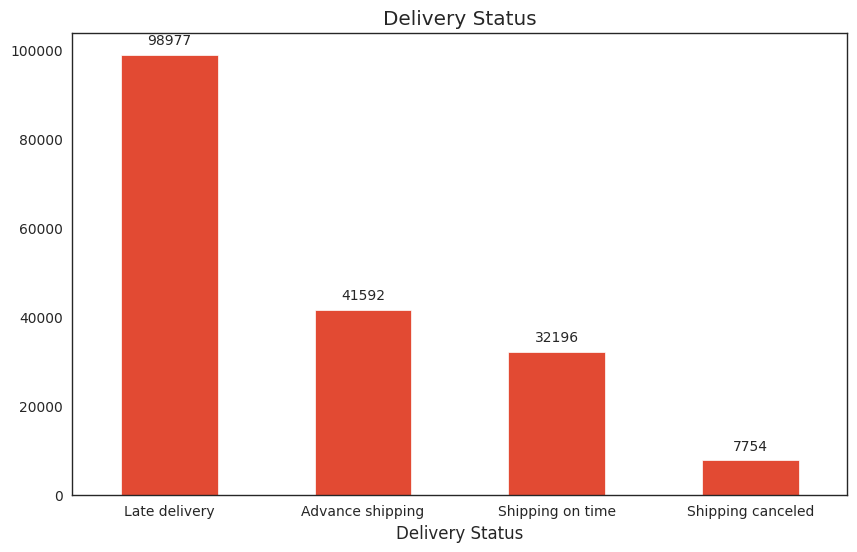

In [ ]:
plt.figure(figsize=(10,6))
ax = df['Delivery Status'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
plt.title('Delivery Status')

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                rotation=0,
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

<ipython-input-54-effefe531aef>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=0)


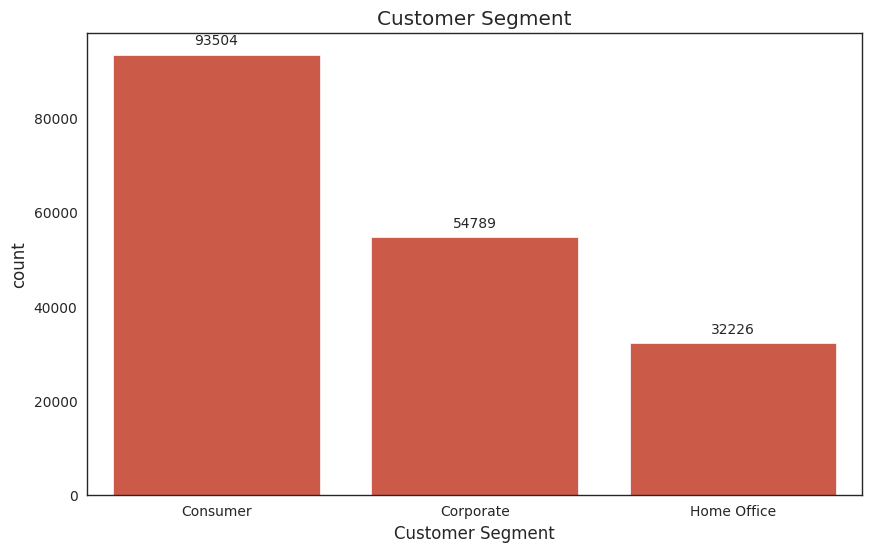

In [ ]:
# Calculate the counts for each category
category_counts = df['Customer Segment'].value_counts()

# Sort the categories based on their counts
sorted_categories = category_counts.index.tolist()

plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Customer Segment', data=df, order=sorted_categories)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.title("Customer Segment")

# Add annotations
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom',
                  xytext=(0, 5),
                  textcoords='offset points')

plt.show()


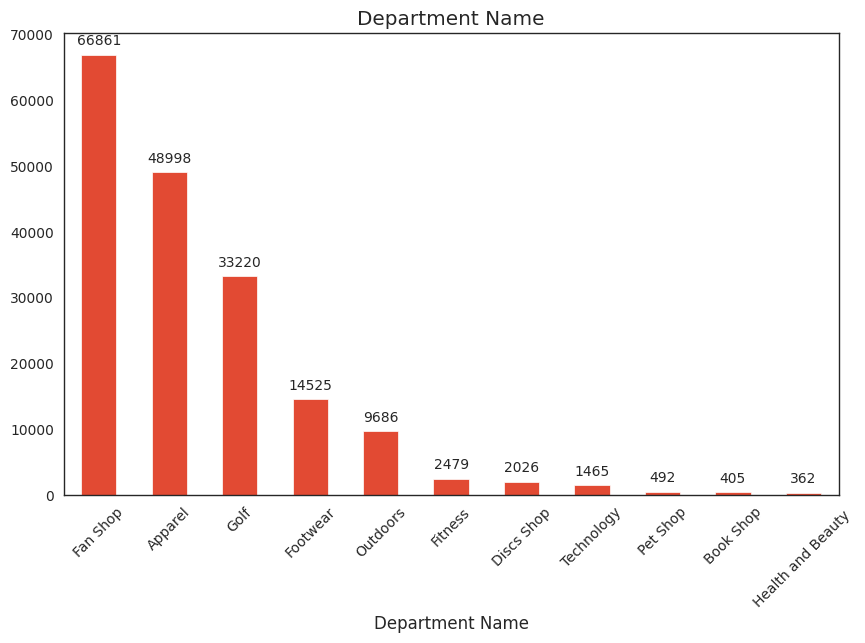

In [ ]:
plt.figure(figsize=(10,6))
ax = df['Department Name'].value_counts().plot(kind='bar')
plt.xticks(rotation = 45)
plt.title('Department Name')

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                rotation=0,
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

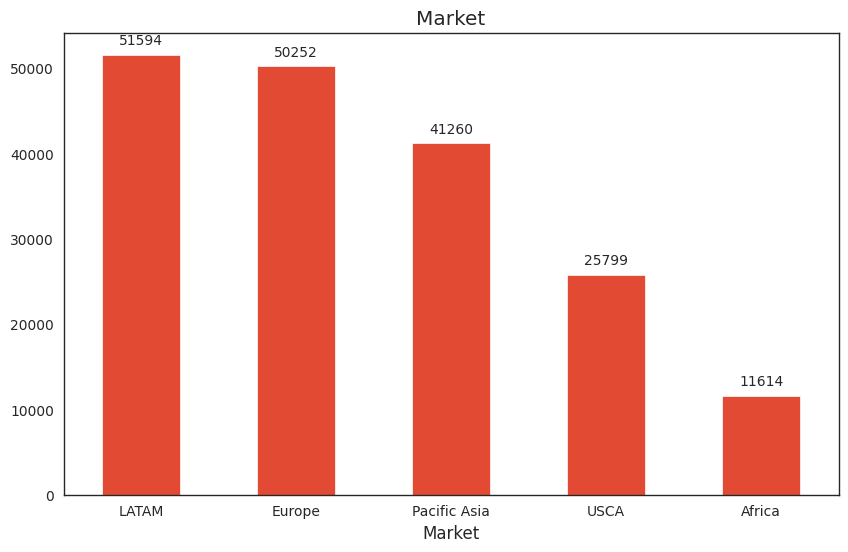

In [ ]:
plt.figure(figsize=(10,6))
ax = df['Market'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
plt.title('Market')

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                rotation=0,
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

<ipython-input-57-03a227592486>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


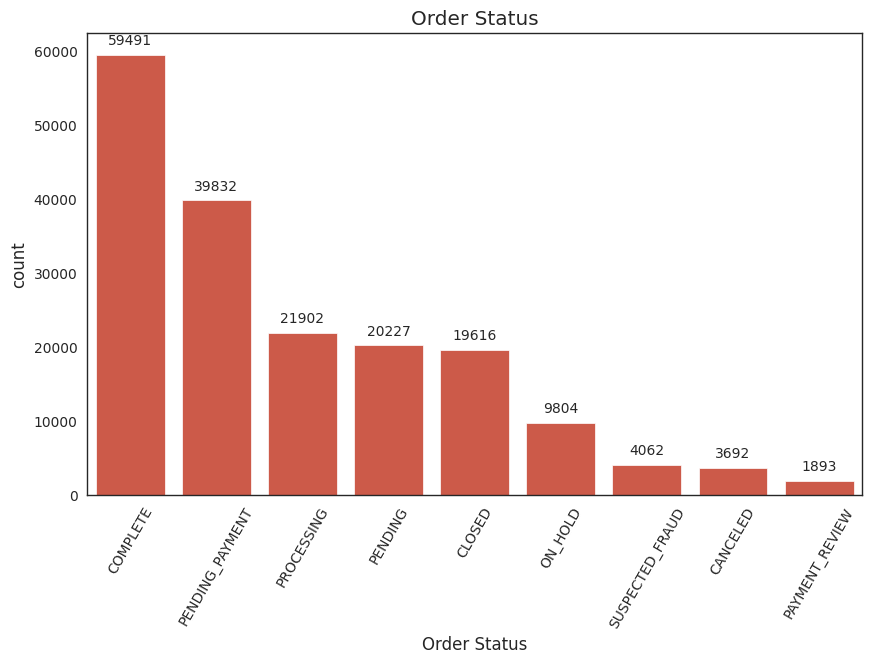

In [ ]:
# Calculate the counts for each category
OrderStatus_counts = df['Order Status'].value_counts()

# Sort the categories based on their counts
sorted_categories = OrderStatus_counts.index.tolist()

plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Order Status', data=df, order=sorted_categories)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plt.title("Order Status")

# Add annotations
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom',
                  xytext=(0, 5),
                  textcoords='offset points')

plt.show()


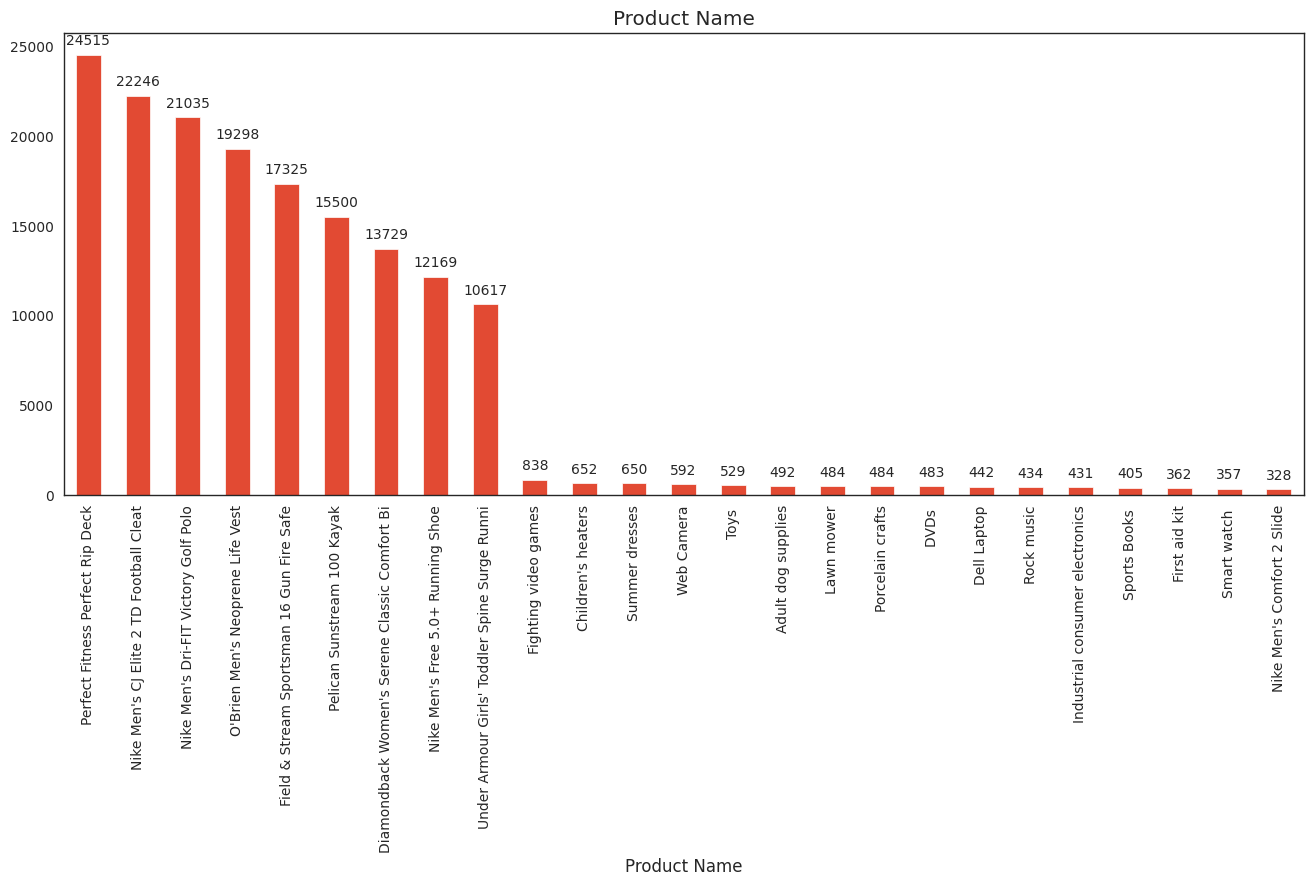

In [ ]:
plt.figure(figsize=(16,6))
ax = df['Product Name'].value_counts()[:25].plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Product Name')

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                rotation=0,
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

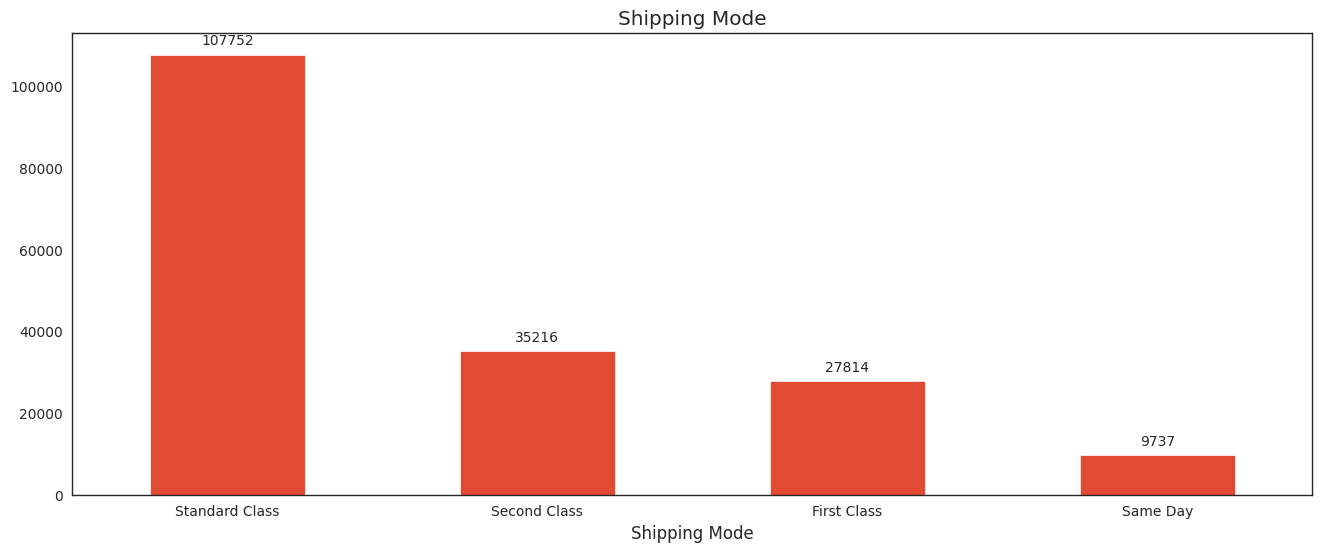

In [ ]:
plt.figure(figsize=(16,6))
ax = df['Shipping Mode'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
plt.title('Shipping Mode')

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                rotation=0,
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

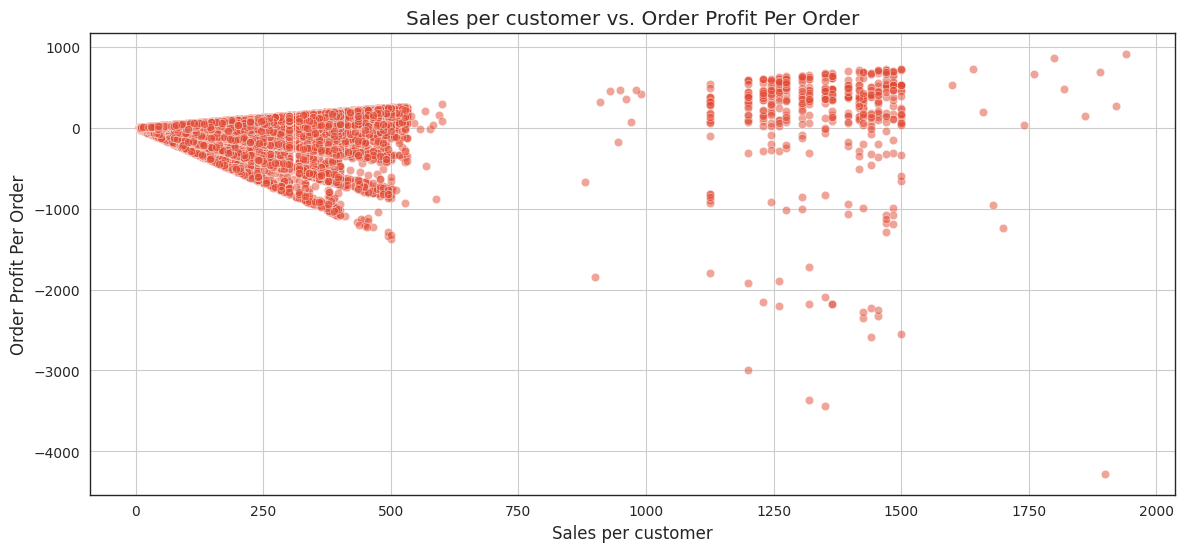

In [ ]:
# Scatter plot: Sales per customer vs. Order Profit Per Order
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='Sales per customer', y='Order Profit Per Order', alpha=0.5)
plt.title('Sales per customer vs. Order Profit Per Order')
plt.xlabel('Sales per customer')
plt.ylabel('Order Profit Per Order')
plt.grid(True)
plt.show()

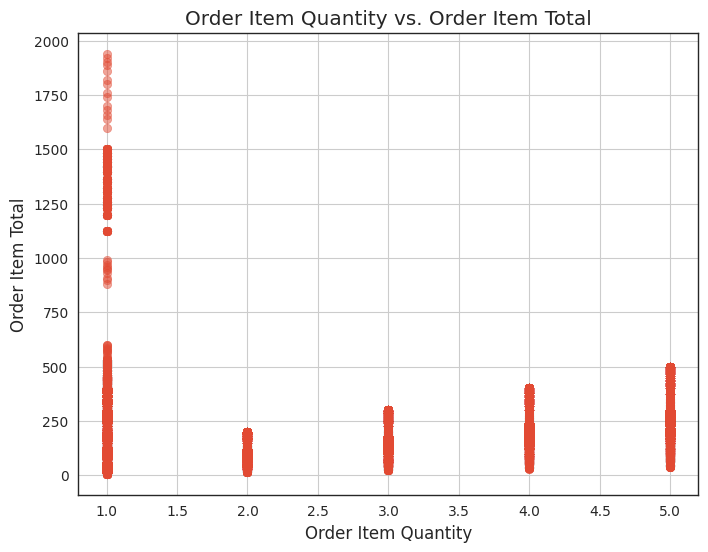

In [ ]:
# Scatter plot: Order Item Quantity vs. Order Item Total
plt.figure(figsize=(8, 6))
plt.scatter(df['Order Item Quantity'], df['Order Item Total'], alpha=0.5)
plt.title('Order Item Quantity vs. Order Item Total')
plt.xlabel('Order Item Quantity')
plt.ylabel('Order Item Total')
plt.grid(True)
plt.show()

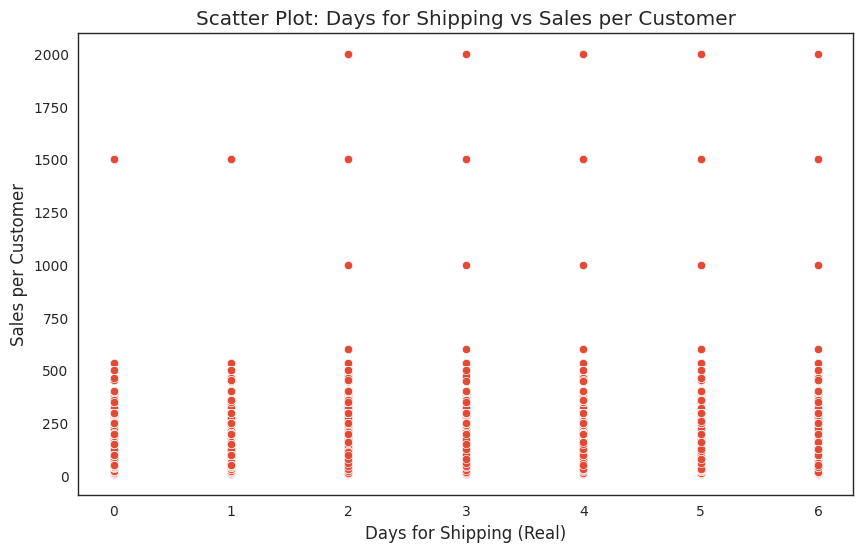

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days for shipping (real)', y='Sales', data=df)
plt.title('Scatter Plot: Days for Shipping vs Sales per Customer')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Sales per Customer')
plt.show()

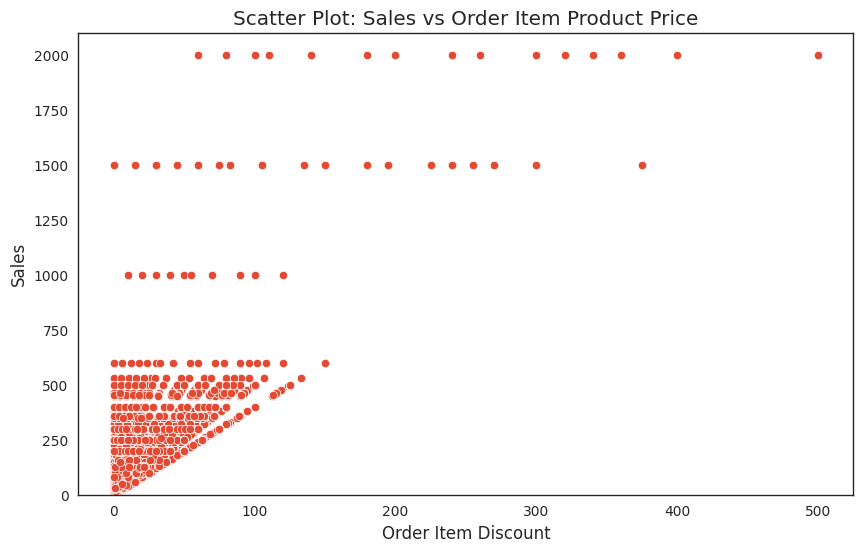

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Item Discount', y='Sales',data=df)
plt.ylim(bottom=0)
plt.title('Scatter Plot: Sales vs Order Item Product Price')
plt.xlabel('Order Item Discount')
plt.ylabel('Sales')
plt.show()

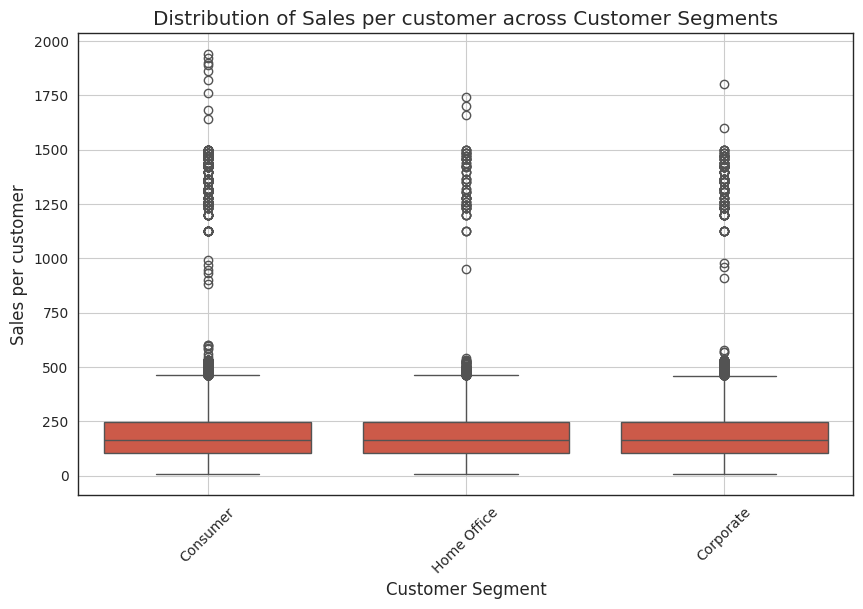

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Segment', y='Sales per customer', data=df)
plt.title('Distribution of Sales per customer across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Sales per customer')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

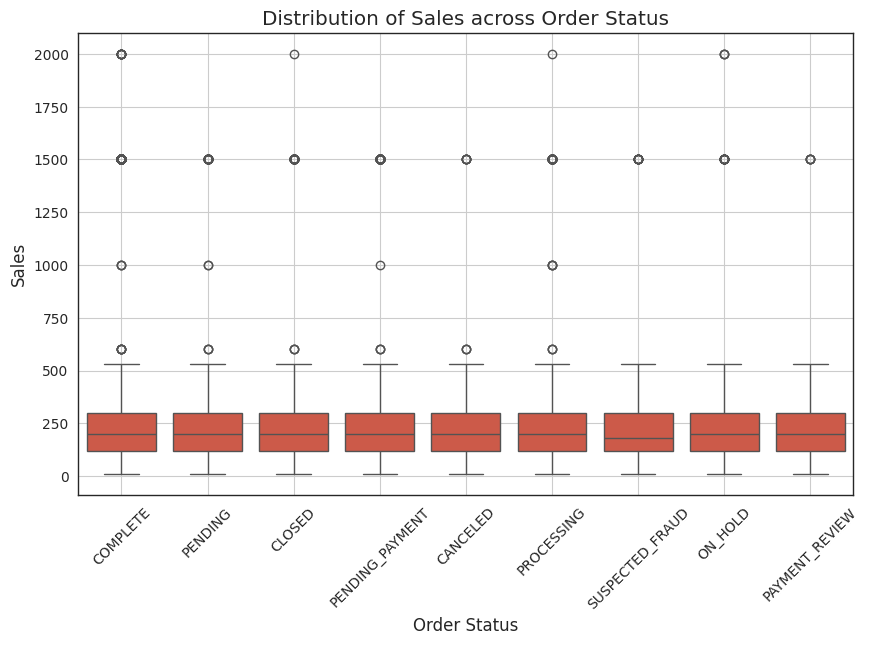

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Order Status', y='Sales', data=df)
plt.title('Distribution of Sales across Order Status')
plt.xlabel('Order Status')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

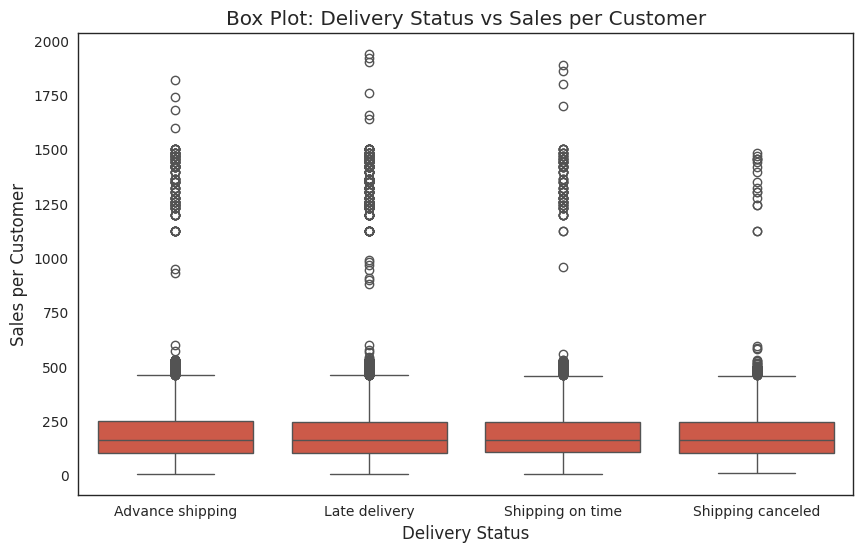

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delivery Status', y='Sales per customer', data=df)
plt.title('Box Plot: Delivery Status vs Sales per Customer')
plt.xlabel('Delivery Status')
plt.ylabel('Sales per Customer')
plt.show()

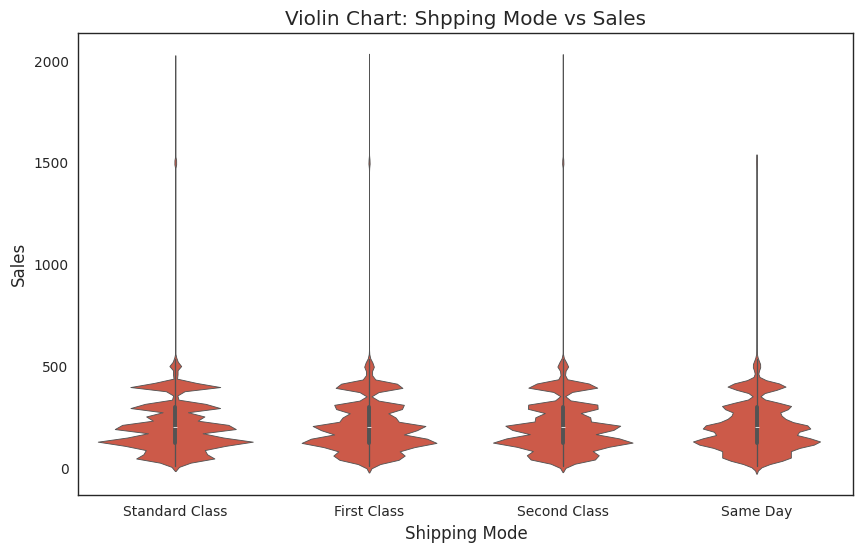

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Shipping Mode', y='Sales', data=df)
plt.title('Violin Chart: Shpping Mode vs Sales')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.show()

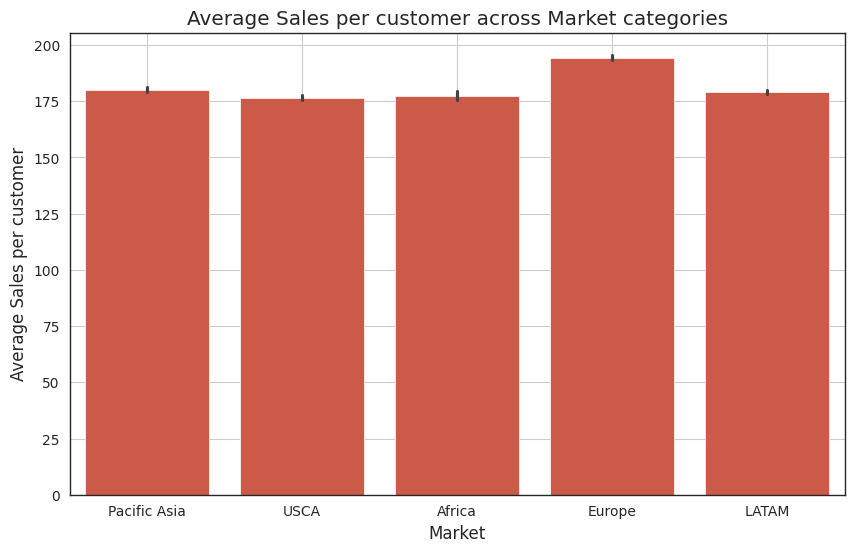

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Market', y='Sales per customer', data=df, estimator=np.mean)
plt.title('Average Sales per customer across Market categories')
plt.xlabel('Market')
plt.ylabel('Average Sales per customer')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

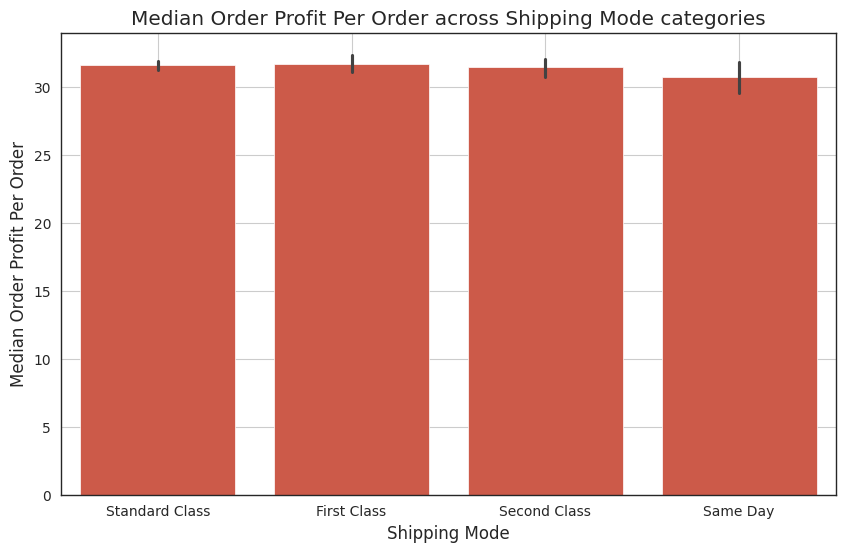

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping Mode', y='Order Profit Per Order', data=df, estimator=np.median)
plt.title('Median Order Profit Per Order across Shipping Mode categories')
plt.xlabel('Shipping Mode')
plt.ylabel('Median Order Profit Per Order')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

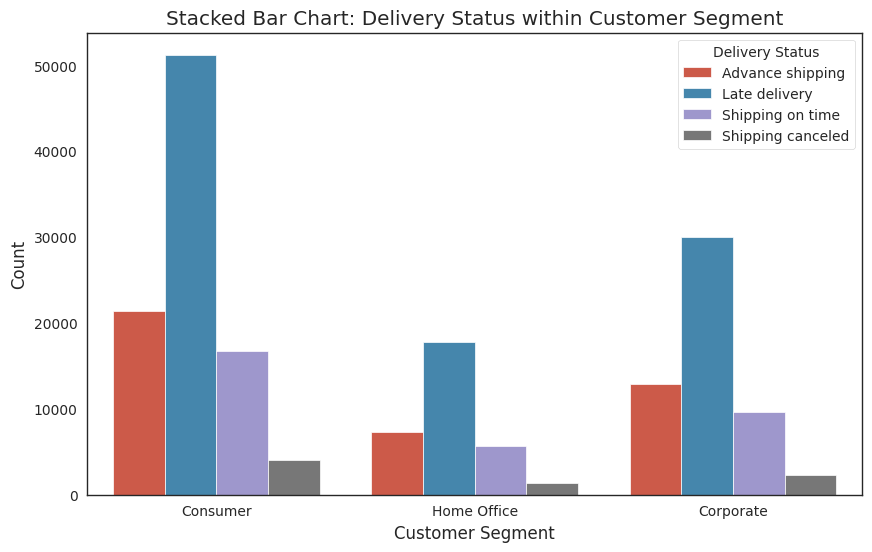

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer Segment', hue='Delivery Status', data=df)
plt.title('Stacked Bar Chart: Delivery Status within Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

In [ ]:
list(df.select_dtypes(include=['number']))

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Latitude',
 'Longitude',
 'Order Customer Id',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Zipcode',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Price',
 'Product Status']

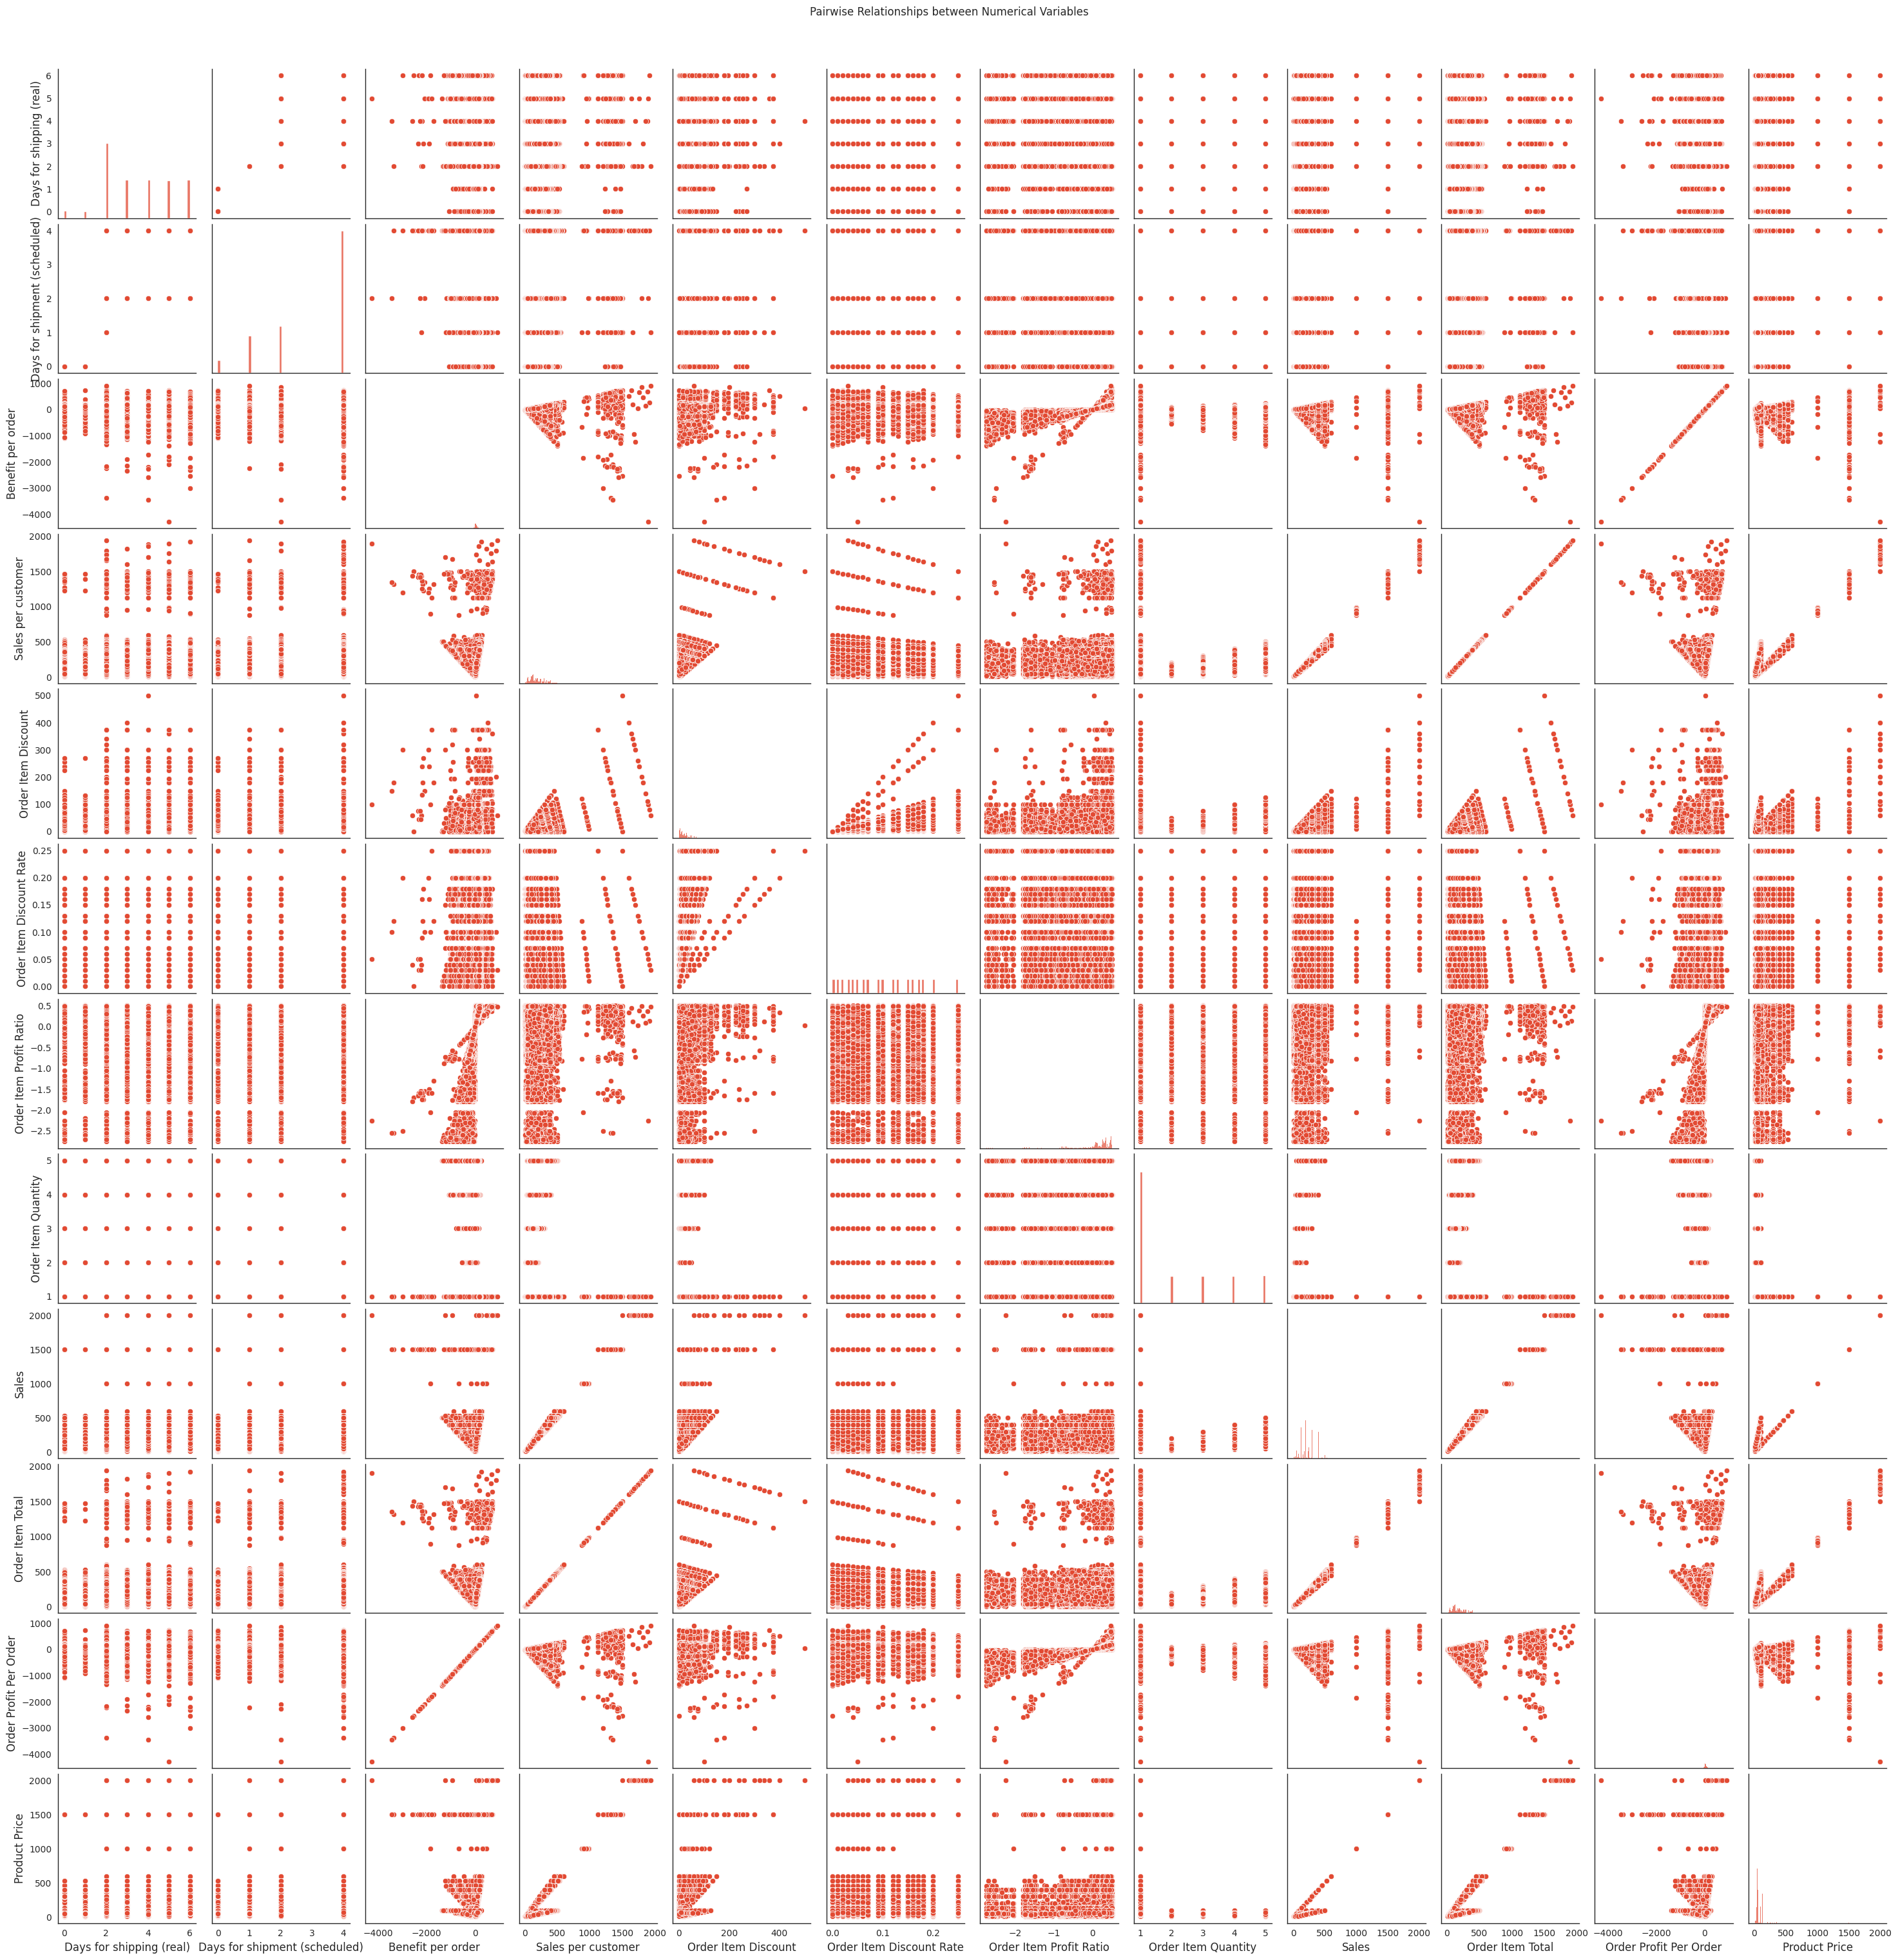

In [ ]:
numerical_features = ['Days for shipping (real)','Days for shipment (scheduled)','Benefit per order','Sales per customer','Order Item Discount','Order Item Discount Rate','Order Item Profit Ratio','Order Item Quantity','Sales','Order Item Total','Order Profit Per Order','Product Price']

# Create pair plot
sns.pairplot(df[numerical_features])
plt.suptitle('Pairwise Relationships between Numerical Variables', y=1.02)
plt.show()

<Axes: >

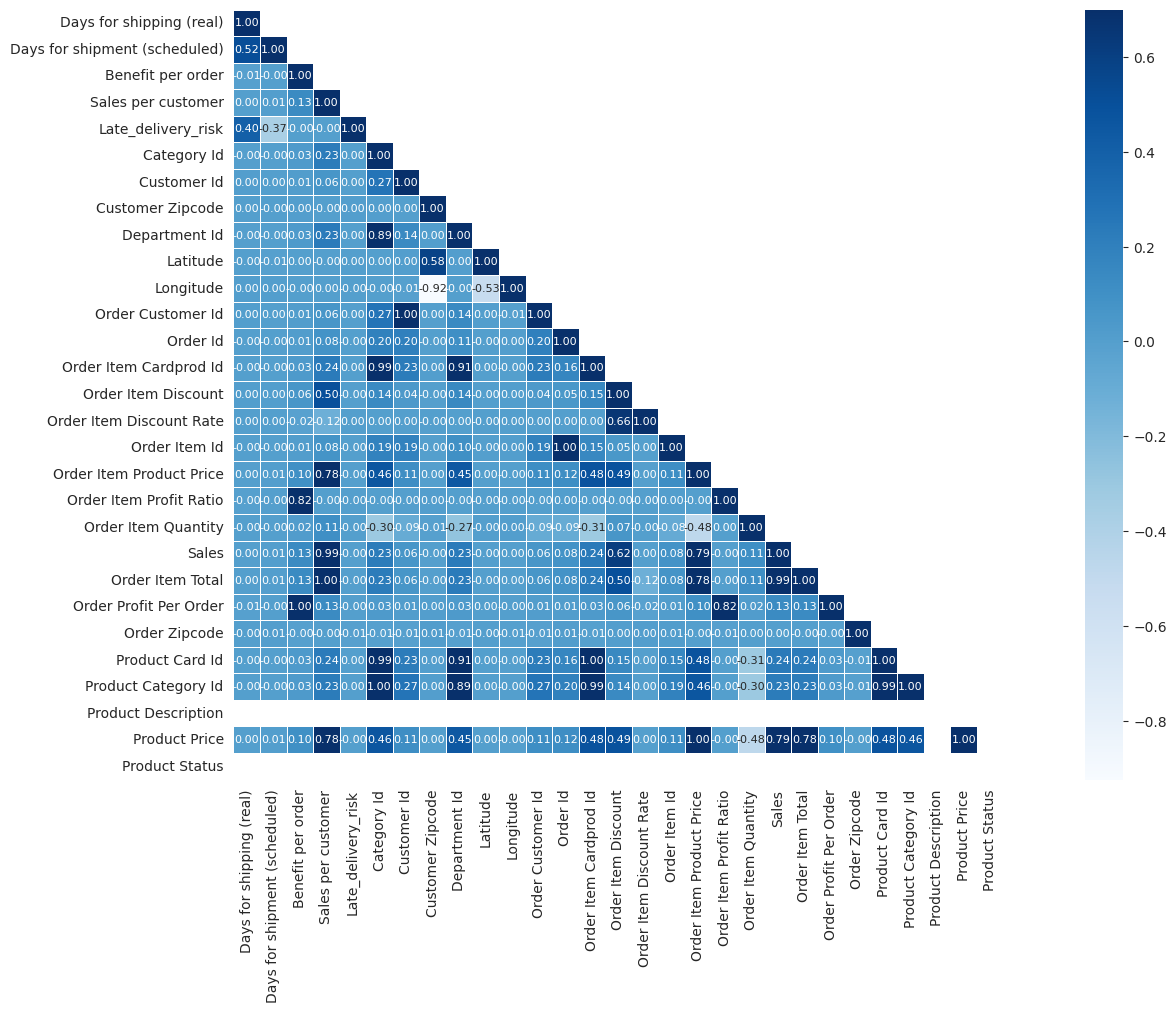

In [ ]:
correlation_map = df.corr(numeric_only=True)
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(21,10)
sns.heatmap(correlation_map,mask=obj, vmax=.7, square=True, cmap='Blues',annot=True, fmt=".2f", annot_kws={"fontsize": 8}, linewidths=0.5)

In [ ]:
#Removing one of the two variables which are highly correlated(>0.99)

# Removing the columns with most missing values and also the columns that are not dependent for the target variable

df=df.drop(['Order Zipcode','Product Description','Type','Customer Email','Customer City',
                'Customer Country','Customer Email','Customer Fname', 'Customer Lname' ,
              'Customer Password','Customer State','Customer Street','Customer Zipcode',
                'Latitude','Longitude','Market','Order Customer Id','Order Id','Order Item Cardprod Id',
                'Order Item Id','Order Zipcode','Product Category Id', 'shipping date (DateOrders)',
                'Product Description', 'Product Image','order date (DateOrders)','Order City','Order State',
                'Order Country','Product Card Id','Sales per customer',
                'Order Profit Per Order','Order Item Product Price'],axis=1)

In [ ]:
df.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,Customer Segment,Department Id,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order Status,Product Name,Product Price,Product Status,Shipping Mode
0,3,4,91.250000,Advance shipping,0,73,Sporting Goods,20755,Consumer,2,...,0.29,1,327.75,314.640015,Southeast Asia,COMPLETE,Smart watch,327.75,0,Standard Class
1,5,4,-249.089996,Late delivery,1,73,Sporting Goods,19492,Consumer,2,...,-0.80,1,327.75,311.359985,South Asia,PENDING,Smart watch,327.75,0,Standard Class
2,4,4,-247.779999,Shipping on time,0,73,Sporting Goods,19491,Consumer,2,...,-0.80,1,327.75,309.720001,South Asia,CLOSED,Smart watch,327.75,0,Standard Class
3,3,4,22.860001,Advance shipping,0,73,Sporting Goods,19490,Home Office,2,...,0.08,1,327.75,304.809998,Oceania,COMPLETE,Smart watch,327.75,0,Standard Class
4,2,4,134.210007,Advance shipping,0,73,Sporting Goods,19489,Corporate,2,...,0.45,1,327.75,298.250000,Oceania,PENDING_PAYMENT,Smart watch,327.75,0,Standard Class


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Delivery Status                180519 non-null  object 
 4   Late_delivery_risk             180519 non-null  int64  
 5   Category Id                    180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   Customer Id                    180519 non-null  int64  
 8   Customer Segment               180519 non-null  object 
 9   Department Id                  180519 non-null  int64  
 10  Department Name                180519 non-null  object 
 11  Order Item Discount            180519 non-null  float64
 12  Order Item Discount Rate      

In [ ]:
# Label Encoding for the features that follow ordinality

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Delivery Status'] = label_encoder.fit_transform(df['Delivery Status'])
df['Order Status'] = label_encoder.fit_transform(df['Order Status'])
df['Shipping Mode'] = label_encoder.fit_transform(df['Shipping Mode'])

In [ ]:
# One hot encoding

columns_to_encode = ['Category Name', 'Customer Segment', 'Department Name', 'Order Region', 'Product Name']

df= pd.get_dummies(df, columns=columns_to_encode)

In [ ]:
# Selecting the dependent and target variables

x=df.drop('Sales',axis=1)
y = df['Sales']

In [ ]:
# Splitting the dataset into 75% train set and 25% test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=1)

print("Shape of training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of training set :  (135389, 222)
Shape of test set :  (45130, 222)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## **Implementing Supervised Machine Learning algorithms.**

## **1.  Linear Regression (OLS)**

In [ ]:
model1_LRM = LinearRegression()

# Fitting the model to the training data
model1_LRM.fit(x_train, y_train)

feature_weights_LRM = model1_LRM.coef_

# Printing the feature weights
print("Feature Weights:", feature_weights_LRM)

Feature Weights: [ 2.17410455e-05 -1.44664952e-05  3.61406982e-04 -1.93606720e-05
 -3.04576769e-05  6.99087461e+07  4.41791272e-06  3.36487519e+09
  4.99992633e+02 -4.40909692e-04 -5.96159519e-05 -4.11442204e-04
  1.93250428e+03 -4.24811458e-06  9.89413080e+08 -3.34045333e+09
 -2.49883410e-05 -2.08125966e+08  7.44861149e+08  8.44490488e+06
  5.21425173e+07 -3.62279408e+08  1.52514392e+09  4.07448474e+08
  1.32019599e+09 -5.17904333e+08  2.64458519e+09 -1.83267676e+09
  6.43382930e+07 -9.03821658e+08 -4.51413422e+08  9.10997733e+08
 -4.95624366e+08  1.17148516e+09 -4.54576616e+08  2.82128326e+09
  2.04893251e+08 -1.36844047e+09  2.61427775e+09 -5.77215383e+08
 -8.57201337e+08 -8.88342675e+08 -7.24371043e+08 -8.10519322e+08
  5.42592976e+08 -1.02521888e+08  2.32145855e+09  5.07679346e+08
 -9.80522444e+08  1.87308072e+07 -2.41650582e+08  3.90868292e+09
 -1.06063777e+09  1.14947225e+09  1.09080305e+09  2.75066887e+09
  2.51761839e+08  3.74411690e+07  2.53552840e+08  9.11082104e+08
  1.9275

In [ ]:
# Predicting the Train set results
y_train_predicted = model1_LRM.predict(x_train)

In [ ]:
# Predicting the Test set results
y_test_predicted = model1_LRM.predict(x_test)

In [ ]:
model1_LRM.intercept_

-1849989948.4715266

In [ ]:
train_score_1=model1_LRM.score(x_train,y_train)
train_score_1

0.9999999998725143

In [ ]:
test_score_1=model1_LRM.score(x_test,y_test)
test_score_1

0.9999999998677692

#Checking the Performance on train set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_train,y_train_predicted)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_train_predicted)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_train_predicted)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_train_predicted))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr )

# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)

MSE : 2.2529527654882136e-06
RMSE : 0.001500983932455046
MAE : 0.0006010925497379323
R2 : 0.9999999998725143
Adjusted R2 : 0.9999999998723049

Mean Absolute Percentage Error (MAPE) on Training Set: 0.0004055915254931078


#Checking the Performance on test set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_test_predicted)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_test_predicted)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_test_predicted))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_test_predicted)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Test Set:", MAPE_test)

MSE : 2.243630291661837e-06
RMSE : 0.001497875259045905
MAE : 0.0006011725369225504
R2 : 0.9999999998677692
Adjusted R2 : 0.9999999998671155

Mean Absolute Percentage Error (MAPE) on Test Set: 0.0004021232836848329


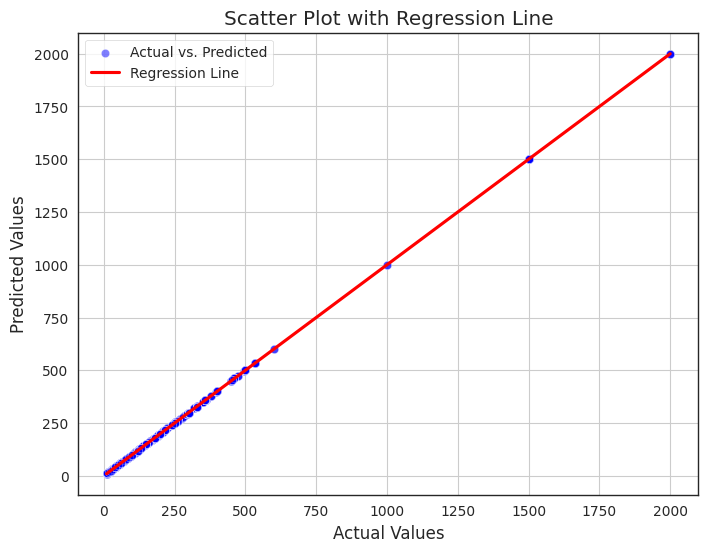

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_predicted, color='blue', alpha=0.5, label='Actual vs. Predicted')

# Plot regression line
sns.regplot(x=y_test, y=y_test_predicted, scatter=False, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


## **2. Lasso Regression**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Create a pipeline with StandardScaler and LassoLars
model2_lasso= make_pipeline(StandardScaler(with_mean=False), LassoLars(alpha=0.3, fit_intercept=False))

# Fit the pipeline to the training data
model2_lasso.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('lassolars', LassoLars(alpha=0.3, fit_intercept=False))])

#Checking the Performance on train set

In [ ]:
train_score_2=model2_lasso.score(x_train, y_train)


print("Lasso Regresion Model Score on train data" , ":" , train_score_2 )

y_train_predicted = model2_lasso.predict(x_train)
y_test_predicted = model2_lasso.predict(x_test)

#calculate MSE
MSE_lasso= mean_squared_error(y_train,y_train_predicted)
print("MSE :",MSE_lasso)

#calculate RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

#calculate MAE
MAE_lasso= mean_absolute_error(y_train, y_train_predicted)
print("MAE :",MAE_lasso)

#calculate r2 and adjusted r2
r2_lasso= r2_score(y_train, y_train_predicted)
print("R2 :",r2_lasso)
Adjusted_R2_lasso = (1-(1-r2_score(y_train, y_train_predicted))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lasso)



MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)


Lasso Regresion Model Score on train data : 0.9999907917911209
MSE : 0.1627292915646957
RMSE : 0.4033971883450549
MAE : 0.2671931027429798
R2 : 0.9999907917911209
Adjusted R2 : 0.9999907766673297

Mean Absolute Percentage Error (MAPE) on Training Set: 0.21782177123084184


#Checking the Performance on test set

In [ ]:
test_score_2=model2_lasso.score(x_test, y_test)

print("\nLasso Regresion Model Score on Test  data" ,":" , test_score_2)


#calculate MSE
MSE_lasso= mean_squared_error(y_test,y_test_predicted)
print("MSE :",MSE_lasso)

#calculate RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

#calculate MAE
MAE_lasso= mean_absolute_error(y_test, y_test_predicted)
print("MAE :",MAE_lasso)

#calculate r2 and adjusted r2
r2_lasso= r2_score(y_test, y_test_predicted)
print("R2 :",r2_lasso)
Adjusted_R2_lasso = (1-(1-r2_score(y_test, y_test_predicted))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lasso)



MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Testing Set:", MAPE_test)



Lasso Regresion Model Score on Test  data : 0.9999902768723381
MSE : 0.1649774387900863
RMSE : 0.4061741483527556
MAE : 0.2659567246118679
R2 : 0.9999902768723381
Adjusted R2 : 0.9999902288055703

Mean Absolute Percentage Error (MAPE) on Testing Set: 0.21952110172255446


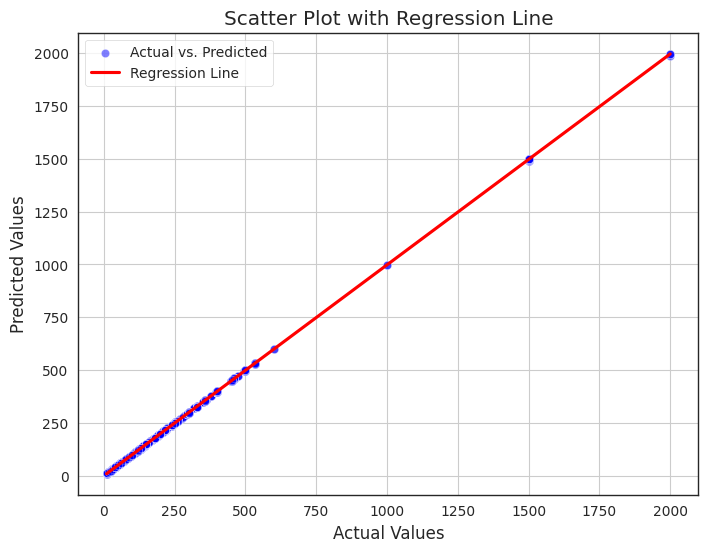

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_predicted, color='blue', alpha=0.5, label='Actual vs. Predicted')

# Plot regression line
sns.regplot(x=y_test, y=y_test_predicted, scatter=False, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


## **3. Ridge Regression**

In [ ]:
model3_ridge = Ridge(alpha=1.0)

# Fitting the model to the training data
model3_ridge.fit(x_train, y_train)


Ridge()

In [ ]:
# Predicting the Train set results
y_train_predicted = model3_ridge.predict(x_train)

In [ ]:
# Predicting the Test set results
y_test_predicted = model3_ridge.predict(x_test)

#Checking the Performance on train set

In [ ]:
train_score_3=model3_ridge.score(x_train, y_train)


print("Ridge Regresion Model Score on train data" , ":" , train_score_3 )


#calculate MSE
MSE_ridge= mean_squared_error(y_train,y_train_predicted)
print("MSE :",MSE_ridge)

#calculate RMSE
RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)

#calculate MAE
MAE_ridge= mean_absolute_error(y_train, y_train_predicted)
print("MAE :",MAE_ridge)

#calculate r2 and adjusted r2
r2_ridge= r2_score(y_train, y_train_predicted)
print("R2 :",r2_ridge)
Adjusted_R2_ridge = (1-(1-r2_score(y_train, y_train_predicted))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_ridge)



MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)


Ridge Regresion Model Score on train data : 0.9999078260999157
MSE : 1.628915423018324
RMSE : 1.276289709673444
MAE : 0.6105349967671627
R2 : 0.9999078260999157
Adjusted R2 : 0.9999076747112098

Mean Absolute Percentage Error (MAPE) on Training Set: 0.6734166503374984


#Checking the Performance on test set

In [ ]:
test_score_3=model3_ridge.score(x_test, y_test)

print("\nRidge Regresion Model Score on Test  data" ,":" , test_score_3)


#calculate MSE
MSE_ridge= mean_squared_error(y_test,y_test_predicted)
print("MSE :",MSE_ridge)

#calculate RMSE
RMSE_ridge=np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)

#calculate MAE
MAE_ridge= mean_absolute_error(y_test, y_test_predicted)
print("MAE :",MAE_ridge)

#calculate r2 and adjusted r2
r2_ridge= r2_score(y_test, y_test_predicted)
print("R2 :",r2_ridge)
Adjusted_R2_ridge = (1-(1-r2_score(y_test, y_test_predicted))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_ridge)



MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Testing Set:", MAPE_test)



Ridge Regresion Model Score on Test  data : 0.9999065191718923
MSE : 1.5861385485678499
RMSE : 1.259419925429104
MAE : 0.6008827213286427
R2 : 0.9999065191718923
Adjusted R2 : 0.9999060570447442

Mean Absolute Percentage Error (MAPE) on Testing Set: 0.6662548889898703


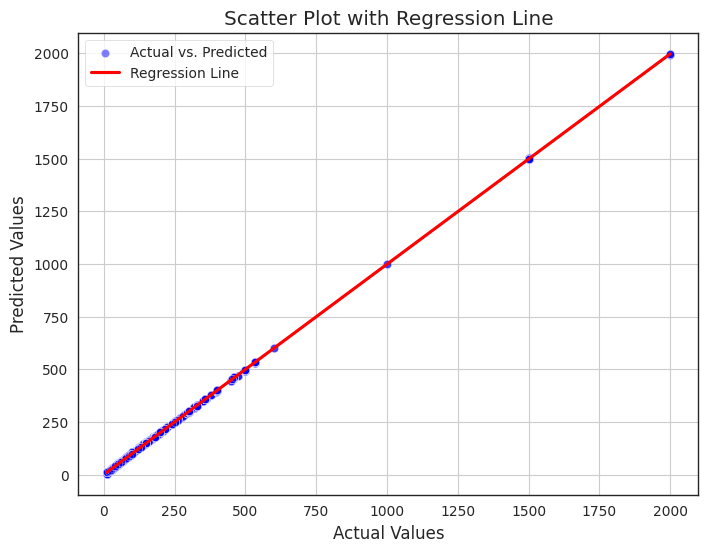

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_predicted, color='blue', alpha=0.5, label='Actual vs. Predicted')

# Plot regression line
sns.regplot(x=y_test, y=y_test_predicted, scatter=False, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


## **4. Decision Tree**

In [ ]:
# Implementing Decision Tree Model and Fitting the model

model4_DTR = DecisionTreeRegressor(max_depth=15, min_samples_leaf=7, min_samples_split=5, max_leaf_nodes=None,max_features=1.0)

# Training the regressor on the training data
model4_DTR.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15, max_features=1.0, min_samples_leaf=7,
                      min_samples_split=5)

In [ ]:
# Predicting the Train set results
y_train_predicted = model4_DTR.predict(x_train)

In [ ]:
# Predicting the Test set results
y_test_predicted = model4_DTR.predict(x_test)

#Checking the Performance on train set

In [ ]:
train_score_4 = model4_DTR.score(x_train, y_train)


print("Decision Tree Model Score on train data" , ":" , train_score_4 )


#calculate MSE
MSE_DTR= mean_squared_error(y_train,y_train_predicted)
print("MSE :",MSE_DTR)

#calculate RMSE
RMSE_DTR=np.sqrt(MSE_DTR)
print("RMSE :",RMSE_DTR)

#calculate MAE
MAE_DTR= mean_absolute_error(y_train, y_train_predicted)
print("MAE :",MAE_DTR)

#calculate r2 and adjusted r2
r2_DTR= r2_score(y_train, y_train_predicted)
print("R2 :",r2_DTR)
Adjusted_R2_DTR = (1-(1-r2_score(y_train, y_train_predicted))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_DTR)



MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)


Decision Tree Model Score on train data : 0.9999086486107968
MSE : 1.6143798477804316
RMSE : 1.2705824836587476
MAE : 0.10054166435826094
R2 : 0.9999086486107968
Adjusted R2 : 0.9999084985730032

Mean Absolute Percentage Error (MAPE) on Training Set: 0.061502785185071136


#Checking the Performance on test set

In [ ]:
test_score_4=model4_DTR.score(x_test, y_test)

print("\nDecision Tree Model Score on Test  data" ,":" , test_score_4)


#calculate MSE
MSE_DTR= mean_squared_error(y_test,y_test_predicted)
print("MSE :",MSE_DTR)

#calculate RMSE
RMSE_DTR=np.sqrt(MSE_DTR)
print("RMSE :",RMSE_DTR)

#calculate MAE
MAE_DTR= mean_absolute_error(y_test, y_test_predicted)
print("MAE :",MAE_DTR)

#calculate r2 and adjusted r2
r2_DTR= r2_score(y_test, y_test_predicted)
print("R2 :",r2_DTR)
Adjusted_R2_DTR = (1-(1-r2_score(y_test, y_test_predicted))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_DTR)



MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Testing Set:", MAPE_test)



Decision Tree Model Score on Test  data : 0.9998762829227212
MSE : 2.099172946585369
RMSE : 1.4488522859785842
MAE : 0.11970785079420805
R2 : 0.9998762829227212
Adjusted R2 : 0.9998756713211634

Mean Absolute Percentage Error (MAPE) on Testing Set: 0.07469465448775832


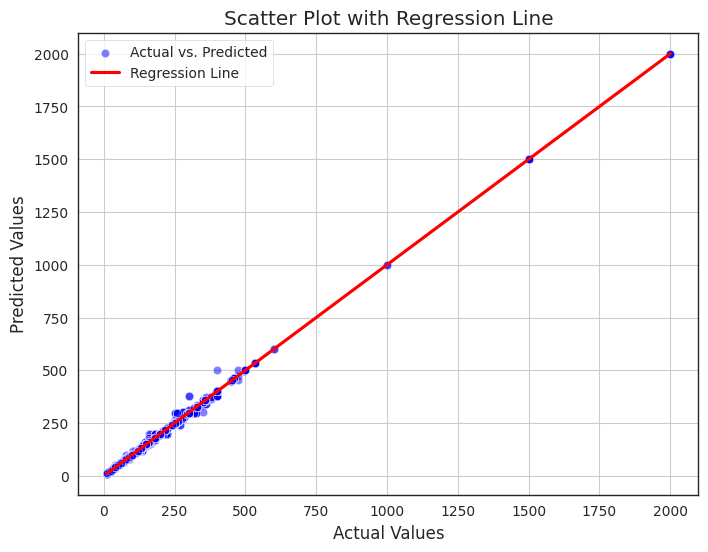

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_predicted, color='blue', alpha=0.5, label='Actual vs. Predicted')

# Plot regression line
sns.regplot(x=y_test, y=y_test_predicted, scatter=False, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


## **5. Random Forest Regressor**

In [ ]:
# Creating Random Forest Regressor
model5_RF = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_leaf=5, min_samples_split=30, max_features=1.0, random_state=42)

# Training regressor on the training data
model5_RF.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=30,
                      random_state=42)

In [ ]:
# Predicting the Train set results
y_train_predicted = model5_RF.predict(x_train)

In [ ]:
# Predicting the Test set results
y_test_predicted = model5_RF.predict(x_test)

#Checking the Performance on train set

In [ ]:
train_score_5 = model5_RF.score(x_train, y_train)


print("Random Forest Model Score on train data" , ":" , train_score_5 )


#calculate MSE
MSE_RF= mean_squared_error(y_train,y_train_predicted)
print("MSE :",MSE_RF)

#calculate RMSE
RMSE_RF=np.sqrt(MSE_RF)
print("RMSE :",RMSE_RF)

#calculate MAE
MAE_RF= mean_absolute_error(y_train, y_train_predicted)
print("MAE :",MAE_RF)

#calculate r2 and adjusted r2
r2_RF= r2_score(y_train, y_train_predicted)
print("R2 :",r2_RF)
Adjusted_R2_RF = (1-(1-r2_score(y_train, y_train_predicted))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_RF)



MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)


Random Forest Model Score on train data : 0.9998963238334597
MSE : 1.8321857545628133
RMSE : 1.3535825628910907
MAE : 0.12699371383699445
R2 : 0.9998963238334597
Adjusted R2 : 0.9998961535531453

Mean Absolute Percentage Error (MAPE) on Training Set: 0.07694581708772869


#Checking the Performance on test set

In [ ]:
test_score_5=model5_RF.score(x_test, y_test)

print("\nRandom Forest Model Score on Test  data" ,":" , test_score_5)


#calculate MSE
MSE_RF= mean_squared_error(y_test,y_test_predicted)
print("MSE :",MSE_RF)

#calculate RMSE
RMSE_RF=np.sqrt(MSE_RF)
print("RMSE :",RMSE_RF)

#calculate MAE
MAE_RF= mean_absolute_error(y_test, y_test_predicted)
print("MAE :",MAE_RF)

#calculate r2 and adjusted r2
r2_RF= r2_score(y_test, y_test_predicted)
print("R2 :",r2_RF)
Adjusted_R2_RF = (1-(1-r2_score(y_test, y_test_predicted))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_RF)



MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Testing Set:", MAPE_test)



Random Forest Model Score on Test  data : 0.999854336393546
MSE : 2.471551290218403
RMSE : 1.5721168182480598
MAE : 0.13945258050042908
R2 : 0.999854336393546
Adjusted R2 : 0.9998536162982239

Mean Absolute Percentage Error (MAPE) on Testing Set: 0.08531187145372805


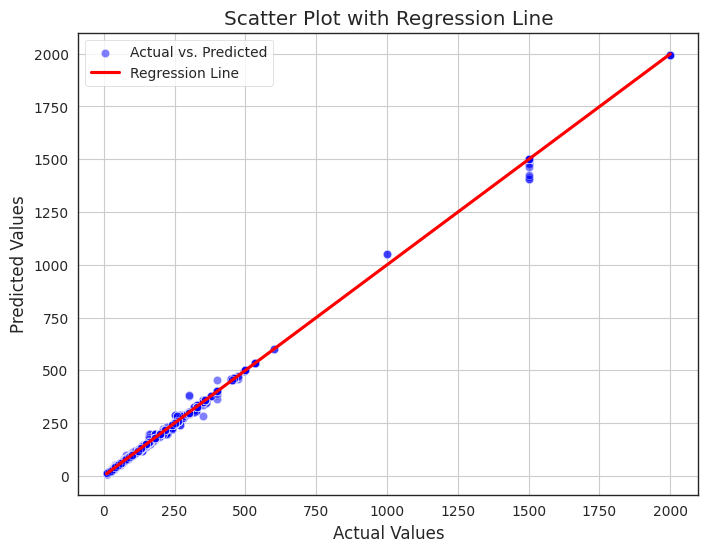

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_predicted, color='blue', alpha=0.5, label='Actual vs. Predicted')

# Plot regression line
sns.regplot(x=y_test, y=y_test_predicted, scatter=False, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [ ]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5],
                         'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5]},
                        index=['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree','Random Forest Regression'])

In [ ]:
score_df

,Train_Score,Test_Score
Linear Regression,1.000000,1.000000
Lasso Regression,0.999991,0.999990
Ridge Regression,0.999908,0.999907
Decision Tree,0.999909,0.999876
Random Forest Regression,0.999896,0.999854


#Model Comparison and Selection


Based on the evaluation metrics, the Linear Regression model emerged as the most suitable for predicting the target variable due to its exceptional performance in minimizing errors and achieving a high level of accuracy. The Linear Regression model exhibited superior performance in terms of RMSE, R2, and MSE, showcasing precise predictions and an excellent fit to the dataset.

#Summary:

The chosen Linear Regression model provides actionable insights into the relationships between various features and the target variable, enabling informed decision-making for optimizing sales forecasts and strategic planning.